<a href="https://colab.research.google.com/github/rileythejones/DS-Unit-1-Build/blob/master/Copy_of_RJ_BC_Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder 
df = pd.read_csv('http://gis-bouldercounty.opendata.arcgis.com/datasets/6ecc28f8192a43888b0a4d4924bcd64c_0.csv')
df.columns

Index(['OBJECTID', 'FEATURE_TYPE', 'LOCATION', 'FEATURE_NAME', 'SURFACE_TYPE',
       'WIDTH', 'SOURCE', 'SRC_YEAR', 'STATUS', 'OWNER', 'MAINTENANCE',
       'ENFORCEMENT', 'PED', 'BIKE', 'HORSE', 'DOG', 'REMARKS', 'TrailSystem',
       'VerticalGain', 'Z_Min', 'Z_Max', 'Z_Mean', 'SLength', 'Min_Slope',
       'Max_Slope', 'Avg_Slope', 'Shapelen'],
      dtype='object')

In [0]:
# df['SURFACE_TYPE'] = df['SURFACE_TYPE'].dropna()

In [4]:
# changing to categorical
df.SURFACE_TYPE = pd.Categorical(df.SURFACE_TYPE)
# option 1 
df['SURFACE_TYPE_CODES'] = pd.factorize(df['SURFACE_TYPE'])[0] + 1
## df['SURFACE_TYPE']= df['SURFACE_TYPE'].astype('category').cat.codes
df['SURFACE_TYPE_CODES'].value_counts()

# option 2 
# LE = LabelEncoder()
# df['SURFACE_TYPE_CODES'] = LE.fit_transform(df['SURFACE_TYPE'])
# df['SURFACE_TYPE_CODES'].value_counts()

3    151
2    139
1     50
6     19
0      9
5      6
4      4
Name: SURFACE_TYPE_CODES, dtype: int64

In [0]:
# Cutting into percentiles.

df['Z_Min_BIN'] = pd.qcut(df.Z_Min, 10, labels=False)
df['Z_Max_BIN'] = pd.qcut(df.Z_Max, 10, labels=False)
df['Z_Mean_BIN'] = pd.qcut(df.Z_Mean, 10, labels=False)

df['Shapelen_BIN'] = pd.qcut(df.Shapelen, 10, labels=False)
df['SLength_BIN'] = pd.qcut(df.SLength, 10, labels=False)

df['VerticalGain_BIN'] = pd.qcut(df.VerticalGain, 10, labels=False)

df['Avg_Slope_BIN'] = pd.qcut(df.Avg_Slope, 10, labels=False)
df['Min_Slope_BIN'] = pd.qcut(df.Min_Slope, 10, labels=False)
df['Max_Slope_BIN'] = pd.qcut(df.Max_Slope, 10, labels=False)






In [0]:
df_new = df[['Z_Mean_BIN', 'Z_Max_BIN','Z_Min_BIN', 'Shapelen_BIN',
             'SLength_BIN', 'FEATURE_TYPE', 'WIDTH', 'SURFACE_TYPE_CODES',
             'VerticalGain_BIN', 'Avg_Slope_BIN', 'Min_Slope_BIN',
             'Max_Slope_BIN', 'SURFACE_TYPE']].copy().dropna()

In [0]:
def scatterplot(df, x_dim, y_dim, category):
   x = df[x_dim]
   y = df[y_dim]
   plt.style.use('fivethirtyeight')
   def f1(x):
     result = "Feature Type: " + str(int(x))
     return result
   categories = df[category].apply(lambda x: f1(x))
   
   
   fig, ax = plt.subplots(figsize=(6, 8))
   
   colors = ['#ED1054', '#00A658', '#220CF3', '#FCD93D', '#F48024', '#040000']
   for i in range(len(df)):
     ax.scatter(x.iloc[i], y.iloc[i], alpha=0.70, color = colors[i%len(colors)], label=categories.iloc[i])
   #adds title and axes labels
   ax.set_title('{}'.format(x_dim) + " against " '{}'.format(y_dim))
   ax.set_xlabel('{}'.format(x_dim))
   ax.set_ylabel('{}'.format(y_dim))
   #removing top and right borders
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   #adds major gridlines
   ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
   #adds legend
   
   ax.legend(categories.unique(), loc='center left', bbox_to_anchor=(1, 0.5))
   plt.show()
   


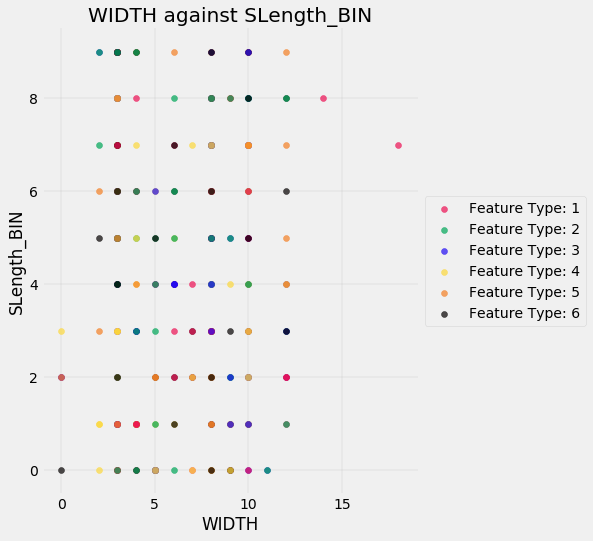

In [10]:
scatterplot(df_new, 'WIDTH', 'SLength_BIN', 'SURFACE_TYPE_CODES')

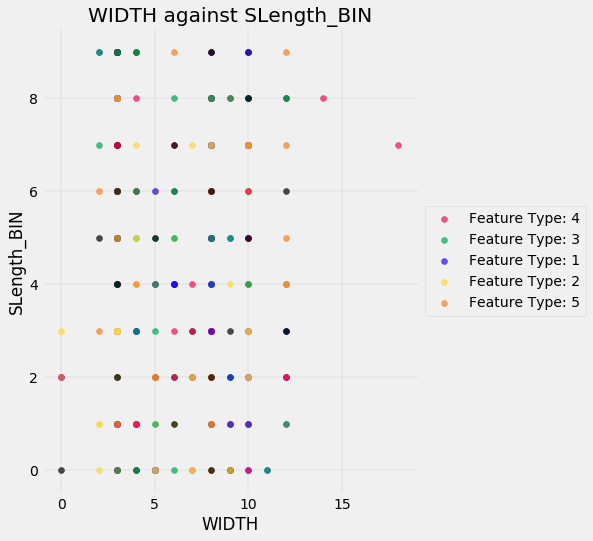

In [11]:
scatterplot(df_new, 'WIDTH', 'SLength_BIN', 'FEATURE_TYPE')

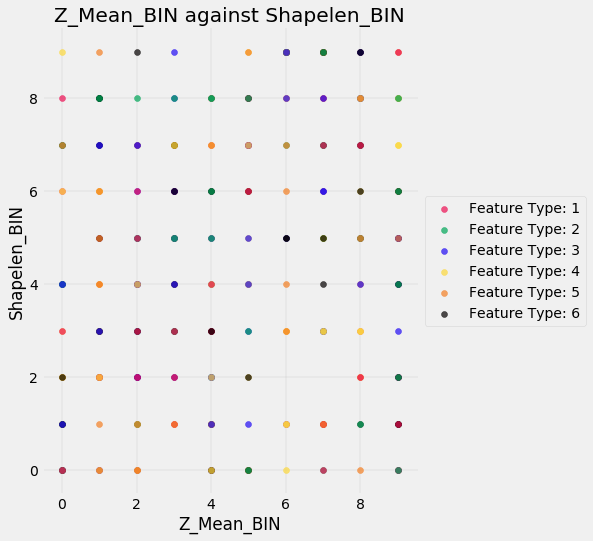

In [14]:
scatterplot(df_new, 'Z_Mean_BIN', 'Shapelen_BIN', 'SURFACE_TYPE_CODES')

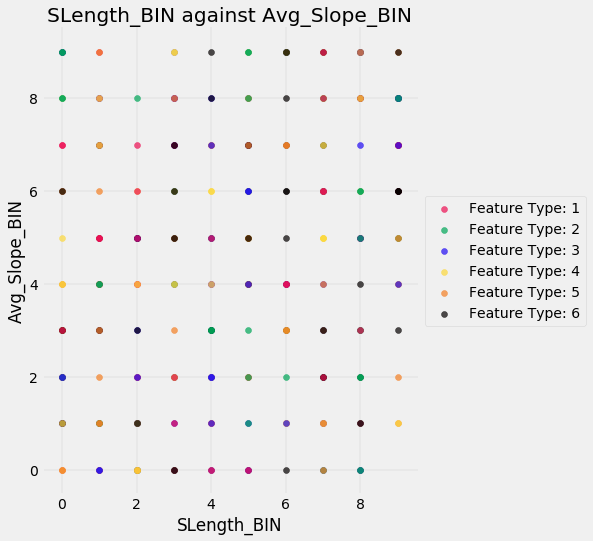

In [13]:
scatterplot(df_new, 'SLength_BIN', 'Avg_Slope_BIN', 'SURFACE_TYPE_CODES')

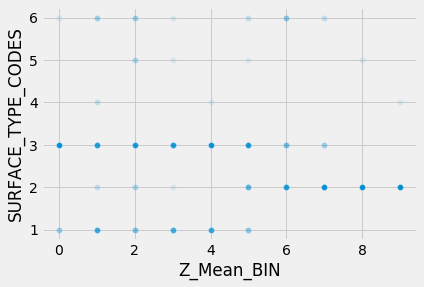

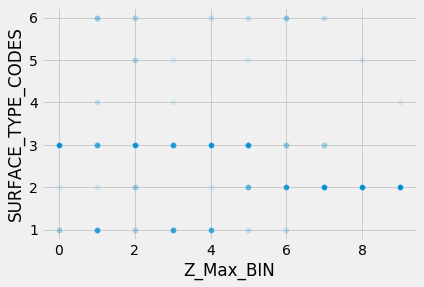

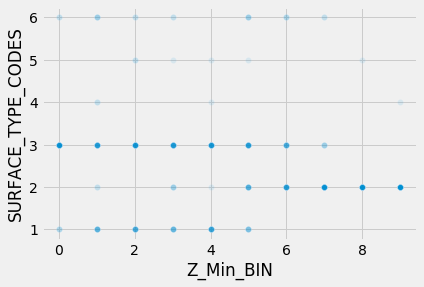

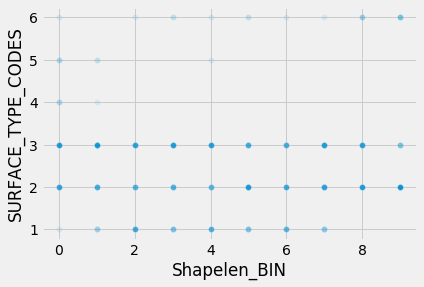

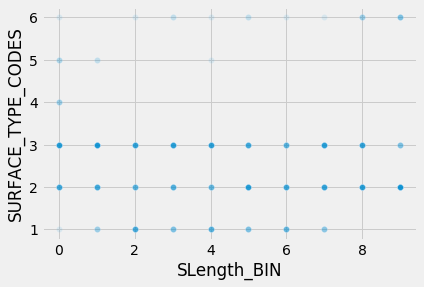

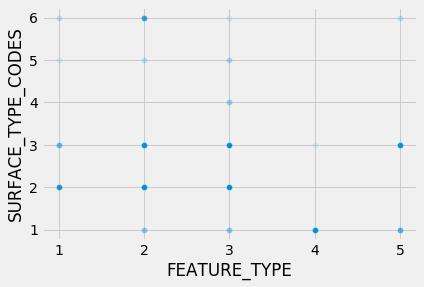

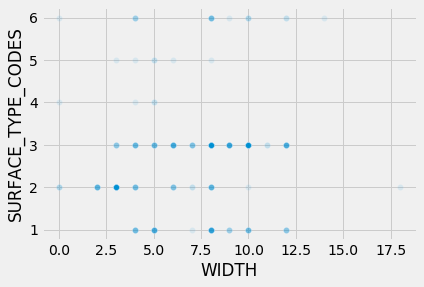

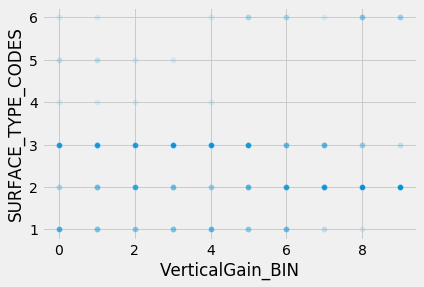

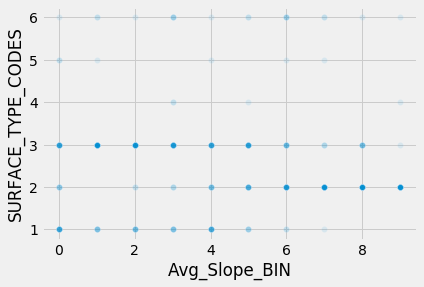

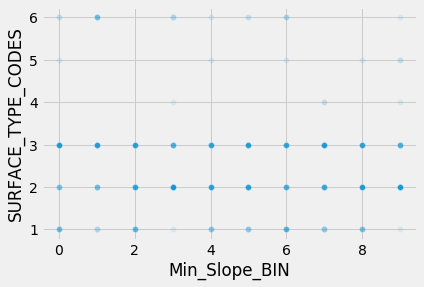

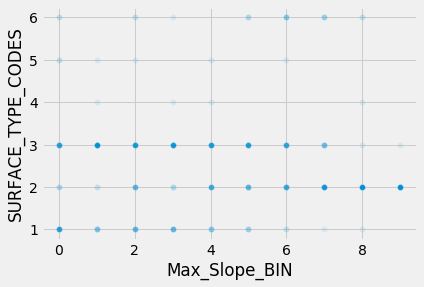

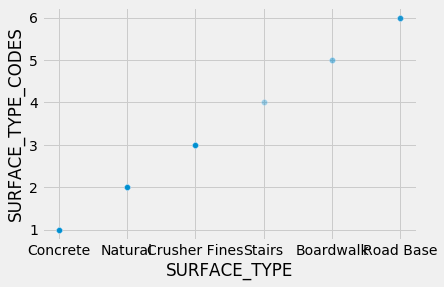

In [12]:
target = 'SURFACE_TYPE_CODES'
features = df_new.columns.drop(['SURFACE_TYPE_CODES'])
for feature in features:
    sns.scatterplot(x=feature, y=target, data=df_new, alpha=0.1)
    plt.show()